In [2]:
#importing required libraries - use pip install -r requirements.txt in a virtual env to avoid run time complications 
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/creditcard.csv')

In [4]:
#checking How much data we have, details about columsn and any missing data
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#gives us the details about fruad vs legitimate values, in this case we have 0 is legitimate and 1 shows us the fraud values
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

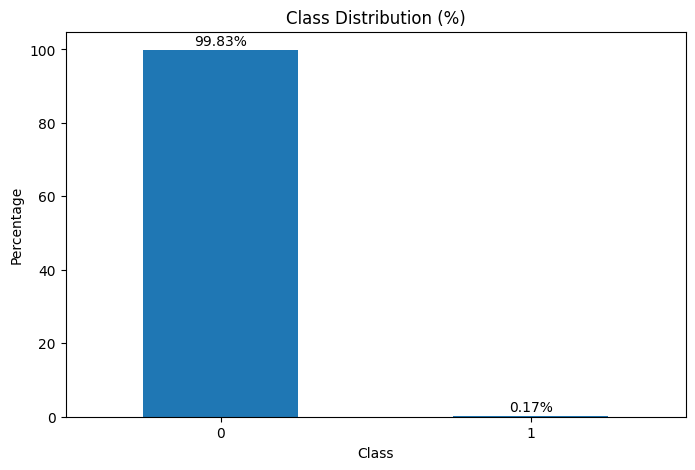

In [6]:
#ploting using matlab
class_counts = df['Class'].value_counts(normalize=True) * 100
ax = class_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Class Distribution (%)')
plt.ylabel('Percentage')
plt.xlabel('Class')
plt.xticks(rotation=0)

# Add percentage labels on top of bars
for i, v in enumerate(class_counts):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

In [7]:
# Preprocessing data - dividing into x (all the columns except class which is the category of fraud and ligitmate) and y 
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
#spliting the data into 80%  train and 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)